In [15]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E:/A Python/Practic Data/A gurgaon/grgn_imputation_clean.csv')

In [3]:
df

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,0.55,5789.0,2.0,2.0,2,2.0,old property,900.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0
1,flat,ats tourmaline,sector 109,1.75,8139.0,3.0,4.0,3+,9.0,relatively new,1946.0,1.0,0.0,0.0,0.0,0.0,0.0,131.0
2,flat,smart world orchard,sector 61,2.20,14202.0,3.0,3.0,2,4.0,new property,1721.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0
3,house,independent,sector 2,5.00,15384.0,6.0,6.0,2,1.0,moderately old,3611.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,flat,signature global city 63a,sector 63a,1.65,15263.0,2.0,2.0,2,1.0,under construction,978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,flat,vatika inxt floors,sector 82a,1.25,8333.0,3.0,2.0,3,2.0,relatively new,1667.0,0.0,1.0,0.0,1.0,0.0,1.0,110.0
3490,house,independent,sector 7,3.85,14650.0,4.0,4.0,3,3.0,old property,2628.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
3491,house,independent,sector 57,3.15,20349.0,5.0,4.0,3+,2.0,moderately old,1548.0,0.0,0.0,1.0,0.0,0.0,1.0,74.0
3492,flat,hsiidc sidco shivalik apartments,sector 1,0.60,4000.0,3.0,2.0,2,5.0,moderately old,1277.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0


In [25]:
train_df=df.drop(columns=['society','price_per_sqft'])

<AxesSubplot:>

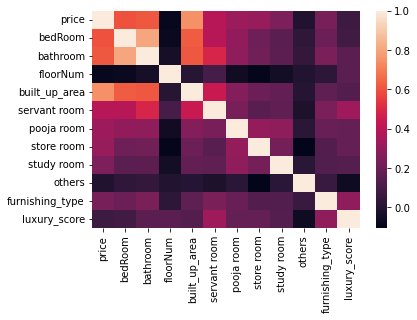

In [6]:
sns.heatmap(train_df.corr())

In [9]:
train_df.corr().price.sort_values(ascending=False)

price              1.000000
built_up_area      0.747095
bathroom           0.613672
bedRoom            0.599606
servant room       0.393684
pooja room         0.325865
store room         0.311911
study room         0.245663
furnishing_type    0.227869
luxury_score       0.075502
others            -0.009188
floorNum          -0.084503
Name: price, dtype: float64

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

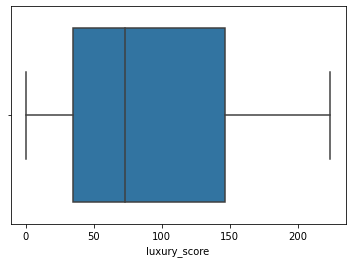

In [10]:
sns.boxplot(train_df.luxury_score)

In [17]:
def catagory_luxury(score):
    if score <= 60:
        return 'Low'
    elif 160 >= score > 60:
        return 'Medium'
    elif score > 160:
        return 'High'
    else:
        return None

In [26]:
train_df['luxury_category']=train_df.luxury_score.apply(catagory_luxury)

In [27]:
train_df.luxury_score.value_counts()

0.0      402
55.0     289
8.0      117
217.0    111
224.0     81
        ... 
219.0      1
56.0       1
198.0      1
11.0       1
18.0       1
Name: luxury_score, Length: 212, dtype: int64

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

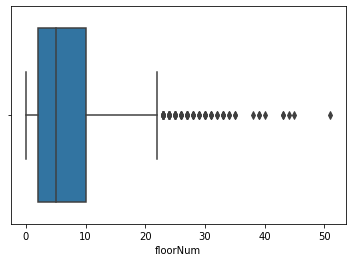

In [20]:
sns.boxplot(train_df.floorNum)

In [21]:
def catagory_floor(score):
    if score <= 2:
        return 'Low Floor'
    elif 10 >= score >= 3:
        return 'Medium  Floor'
    elif score > 10:
        return 'High  Floor'
    else:
        return None

In [28]:
train_df['floor_category']=train_df.floorNum.apply(catagory_floor)

In [33]:
train_df.drop(columns=['floorNum','luxury_scor'],inplace=True).

SyntaxError: invalid syntax (540472233.py, line 1)

In [70]:
train_df.columns.shape

(18,)

In [35]:
train_df.select_dtypes(include=['object']).columns

Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')

In [62]:
from sklearn.preprocessing import OrdinalEncoder

df_label = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

for i in categorical_cols:
    oe = OrdinalEncoder()
    df_label[i] = oe.fit_transform(df_label[[i]]) 
    print(oe.categories_)
    
X_label = df_label.drop(columns=['price'])
y_label = df_label.price    

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 12a', 'sector 13',
       'sector 14', 'sector 15', 'sector 17', 'sector 17a', 'sector 17b',
       'sector 2', 'sector 21', 'sector 22', 'sector 23', 'sector 23a',
       'sector 24', 'sector 25', 'sector 26', 'sector 27', 'sector 28',
       'sector 3', 'sector 30', 'sector 31', 'sector 33', 'sector 36',
       'sector 36a', 'sector 37c', 'sector 37d', 'sector 38', 'sector 39',
       'sector 3a', 'sector 4', 'sector 40', 'sector 41', 'sector 43',
       'sector 45', 'sector 46', 'sector 47', 'sector 48', 'sector 49',
       'sector 5', 'sector 50', 'sector 51', 'sector 52', 'sector 53',
       'sector 54', 'sector 55', 'sector 56', 'sect

In [71]:
fi_df1=df_label.corr()['price'].reset_index().rename(columns={'index':'feature','price':'corr_coef'})
fi_df1

,feature,corr_coef
0,property_type,0.514273
1,sector,-0.200016
2,price,1.000000
3,bedRoom,0.599606
4,bathroom,0.613672
5,balcony,0.268782
6,floorNum,-0.084503
7,agePossession,-0.138398
8,built_up_area,0.747095
9,servant room,0.393684


In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_label,y_label)

fi_df2 = pd.DataFrame({'feature':X_label.columns,
                      'rf_importance':rf.feature_importances_}).sort_values(by='rf_importance',ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.641497
0,property_type,0.106210
1,sector,0.097072
14,luxury_score,0.032200
3,bathroom,0.021145
5,floorNum,0.021123
2,bedRoom,0.020209
8,servant room,0.010831
4,balcony,0.010154
13,furnishing_type,0.009649


In [66]:
#df.query("price<0.55")

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gr = GradientBoostingRegressor()
gr.fit(X_label,y_label)

fi_df3 = pd.DataFrame({'feature':X_label.columns,
                      'gb_importance':rf.feature_importances_}).sort_values(by='gb_importance',ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.641497
0,property_type,0.106210
1,sector,0.097072
14,luxury_score,0.032200
3,bathroom,0.021145
5,floorNum,0.021123
2,bedRoom,0.020209
8,servant room,0.010831
4,balcony,0.010154
13,furnishing_type,0.009649


In [76]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

#calculate permutation_importance
per_imp = permutation_importance(rf,X_test,y_test, n_repeats=30 ,random_state=42)

fi_df4 = pd.DataFrame({'feature':X_label.columns,
                      'permutation_importance':rf.feature_importances_}).sort_values(by='permutation_importance',ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.648671
0,property_type,0.101695
1,sector,0.092773
14,luxury_score,0.029557
3,bathroom,0.023358
2,bedRoom,0.018974
5,floorNum,0.017901
8,servant room,0.012423
4,balcony,0.011412
6,agePossession,0.009308


# Lasso

In [99]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_scale=scaler.fit_transform(X_label)

laso = Lasso() 
laso.fit(X_scale,y_label)

fi_df5 = pd.DataFrame({'feature':X_label.columns, 'lasso_coeff':rf.feature_importances_}).sort_values(by='lasso_coeff',ascending=False)

fi_df5

,feature,lasso_coeff
7,built_up_area,0.648671
0,property_type,0.101695
1,sector,0.092773
14,luxury_score,0.029557
3,bathroom,0.023358
2,bedRoom,0.018974
5,floorNum,0.017901
8,servant room,0.012423
4,balcony,0.011412
6,agePossession,0.009308


# Technique 6 - RFE

In [97]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

select_label = RFE(estimator,n_features_to_select=X_label.shape[1],step=1)
select_label = select_label.fit(X_label,y_label)

select_features = X_label.columns[select_label.support_]

select_coeff = select_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame({
    'feature': select_features,
    'rfe_score': select_coeff
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,built_up_area,0.639054
0,property_type,0.106281
1,sector,0.100399
14,luxury_score,0.031386
3,bathroom,0.026270
5,floorNum,0.019453
2,bedRoom,0.017735
13,furnishing_type,0.010628
4,balcony,0.010076
6,agePossession,0.009768


In [105]:
select_label.estimator_.feature_importances_

array([0.10628057, 0.10039853, 0.01773454, 0.02626984, 0.01007582,
       0.01945318, 0.00976761, 0.6390545 , 0.00712693, 0.00335724,
       0.00423579, 0.004418  , 0.00192137, 0.01062768, 0.03138591,
       0.00553705, 0.00235543])

# Technique 7 -  Linear_reg_Weights

In [106]:
lin_reg = LinearRegression()
lin_reg.fit(X_scale, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,built_up_area,1.474878
0,property_type,0.720948
3,bathroom,0.306005
10,store room,0.215862
13,furnishing_type,0.198129
11,study room,0.169638
8,servant room,0.133688
15,luxury_category,0.086984
9,pooja room,0.071247
5,floorNum,0.070016


In [101]:
!pip install SHAP

In [ ]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

#shap_values

fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8.

In [113]:
final_df=fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [120]:
final_df1=final_df.divide(final_df.sum(axis=0),axis=1)

In [122]:
(final_df1.sum(axis=0))

corr_coef                 1.0
rf_importance             1.0
gb_importance             1.0
permutation_importance    1.0
lasso_coeff               1.0
rfe_score                 1.0
reg_coeffs                1.0
dtype: float64

In [133]:
final_df.sum(axis=1)

feature
property_type      1.757311
sector             0.207988
bedRoom            0.722862
bathroom           1.034953
balcony            0.245428
floorNum           0.083013
agePossession     -0.080154
built_up_area      5.441364
servant room       0.581006
pooja room         0.414796
store room         0.557048
study room         0.436028
others            -0.036539
furnishing_type    0.473552
luxury_score       0.221622
luxury_category    0.096887
floor_category     0.085675
dtype: float64

In [126]:
final_df

,corr_coef,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
property_type,0.514273,0.106210,0.106210,0.101695,0.101695,0.106281,0.720948
sector,-0.200016,0.097072,0.097072,0.092773,0.092773,0.100399,-0.072084
bedRoom,0.599606,0.020209,0.020209,0.018974,0.018974,0.017735,0.027155
bathroom,0.613672,0.021145,0.021145,0.023358,0.023358,0.026270,0.306005
balcony,0.268782,0.010154,0.010154,0.011412,0.011412,0.010076,-0.076562
floorNum,-0.084503,0.021123,0.021123,0.017901,0.017901,0.019453,0.070016
agePossession,-0.138398,0.009154,0.009154,0.009308,0.009308,0.009768,0.011553
built_up_area,0.747095,0.641497,0.641497,0.648671,0.648671,0.639054,1.474878
servant room,0.393684,0.010831,0.010831,0.012423,0.012423,0.007127,0.133688


In [119]:
final_df.sum(axis=0)

corr_coef                 3.921169
rf_importance             1.000000
gb_importance             1.000000
permutation_importance    1.000000
lasso_coeff               1.000000
rfe_score                 1.000000
reg_coeffs                3.321671
dtype: float64

In [118]:
final_df

,corr_coef,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
property_type,0.514273,0.106210,0.106210,0.101695,0.101695,0.106281,0.720948
sector,-0.200016,0.097072,0.097072,0.092773,0.092773,0.100399,-0.072084
bedRoom,0.599606,0.020209,0.020209,0.018974,0.018974,0.017735,0.027155
bathroom,0.613672,0.021145,0.021145,0.023358,0.023358,0.026270,0.306005
balcony,0.268782,0.010154,0.010154,0.011412,0.011412,0.010076,-0.076562
floorNum,-0.084503,0.021123,0.021123,0.017901,0.017901,0.019453,0.070016
agePossession,-0.138398,0.009154,0.009154,0.009308,0.009308,0.009768,0.011553
built_up_area,0.747095,0.641497,0.641497,0.648671,0.648671,0.639054,1.474878
servant room,0.393684,0.010831,0.010831,0.012423,0.012423,0.007127,0.133688


In [28]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',400)
pd.set_option('display.max_column',None)
pd.set_option('display.max_colwidth',200)

df=pd.read_csv('E:/A Python/Practic Data/mobi_new.csv')
df

In [29]:
df=pd.read_csv('E:/A Python/Practic Data/mobi_new.csv')
df

,Unnamed: 0,brand,model,price,rating,has_5g,has_nfc,os,num_cores,processor_brand,processor_speed,battery_capacity,Fast_charging_available,Fast_charging,screen_size,screen_axis_x,screen_axis_y,ppi,primary_rear_lens,no_rear_camera,no_front_camera,ram_capacity,internal_memory,extended_upto
0,0,OnePlus,OnePlus Nord CE 2 Lite 5G,18999,81.0,True,False,Android,8,Snapdragon,2.20,5000,1,33.0,6.59,1080,2412,401.02,64,3,2,6,128,1024
1,1,Motorola,Motorola Moto G62 5G,14999,81.0,True,False,Android,8,Snapdragon,2.20,5000,1,15.0,6.55,1080,2400,401.80,50,3,2,6,128,1024
2,2,Samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,Android,8,Exynos,2.40,5000,1,15.0,6.60,1080,2408,399.86,50,3,2,4,64,1024
3,3,Realme,Realme 10 Pro Plus,24999,82.0,True,False,Android,8,Dimensity,2.60,5000,1,67.0,6.70,1080,2412,394.44,108,3,2,6,128,0
4,4,Apple,Apple iPhone 14,72999,81.0,True,True,iOS,6,Bionic,3.22,3279,1,30.0,6.10,1170,2532,457.25,12,2,2,6,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,851,Vivo,Vivo Y81 (4GB RAM + 32GB),15000,60.0,False,False,Android,8,Helio,2.00,3260,0,NaN,6.22,1520,720,270.40,13,1,2,4,32,256
852,852,Yu,Yu Ace,6595,62.0,False,False,Android,4,Helio,1.50,4000,0,NaN,5.45,1440,720,295.41,13,1,2,3,32,102428
853,853,Xiaomi,Xiaomi Redmi 6A (2GB RAM + 32GB),6999,68.2,False,False,Android,4,Helio,2.00,3000,0,NaN,5.45,720,1440,295.41,13,1,2,2,32,256
854,854,Nokia,Nokia 3.1 (3GB RAM + 32GB),7499,68.2,False,True,Android,8,Helio,1.50,2990,0,NaN,5.20,720,1440,309.61,13,1,2,3,32,256


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               856 non-null    int64  
 1   brand                    856 non-null    object 
 2   model                    856 non-null    object 
 3   price                    856 non-null    int64  
 4   rating                   856 non-null    float64
 5   has_5g                   856 non-null    bool   
 6   has_nfc                  856 non-null    bool   
 7   os                       856 non-null    object 
 8   num_cores                856 non-null    int64  
 9   processor_brand          856 non-null    object 
 10  processor_speed          856 non-null    float64
 11  battery_capacity         856 non-null    int64  
 12  Fast_charging_available  856 non-null    int64  
 13  Fast_charging            627 non-null    float64
 14  screen_size              8